In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку из дискретного распределения

In [2]:
X = np.random.choice([1, 2, 3, 4], 30)

In [4]:
X

array([4, 1, 2, 4, 3, 1, 2, 2, 2, 2, 4, 1, 4, 1, 3, 1, 4, 1, 4, 4, 4, 2, 3,
       2, 3, 2, 3, 2, 3, 1])

Посчитаем вероятности $\bar{p_1}, \bar{p_2}, \bar{p_3}, \bar{p_4}$ по выборке 

$$\bar{p}_k = \frac{1}{n} \sum_{i=0}^n [X_i = a_k], $$


In [12]:
## напишите решение здесь
X = np.random.choice([1, 2, 3, 4], 10000)
a = [1, 2, 3, 4]
n = len(X)
# p = [sum([1 if a[i] == X[j] 0 for j in range(n)]) for i in range(len(a))]
p = np.zeros(len(a))
for i in range(len(a)):
    for j in range(n):
        if a[i] == X[j]:
            p[i] += 1
prob = p / n
print(prob)

[ 0.2531  0.2462  0.2535  0.2472]


In [13]:
for i in range(4):
    print(sum([1 for p in X if p==i+1])/X.size)

0.2531
0.2462
0.2535
0.2472


Сгенерируем выборку из непрерывного распределения 

In [3]:
## выберите любимое распределение и сгенерируйте выборку размера 100
random_val = sts.expon(3)
sample = random_val.rvs(1000)

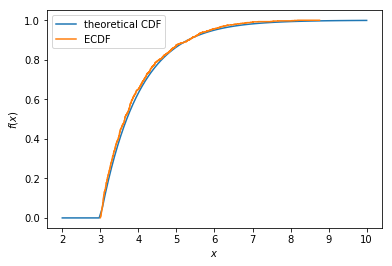

In [7]:
# выберите подходящий масштаб
x = np.linspace(2, 10, 100)
cdf = random_val.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Построение гистограммы

In [23]:
plt.hist(sample, normed=True)
plt.plot(x, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

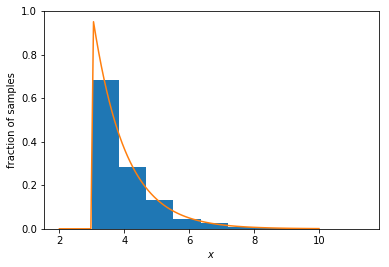

In [25]:
sample = random_val.rvs(5000)
plt.hist(sample, normed=True)
plt.plot(x, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [22]:
pdf = random_val.pdf(x)
plt.plot(x, pdf)

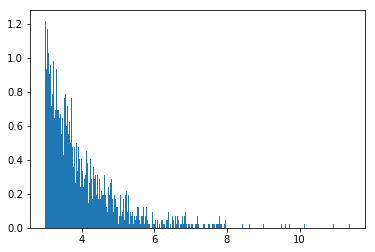

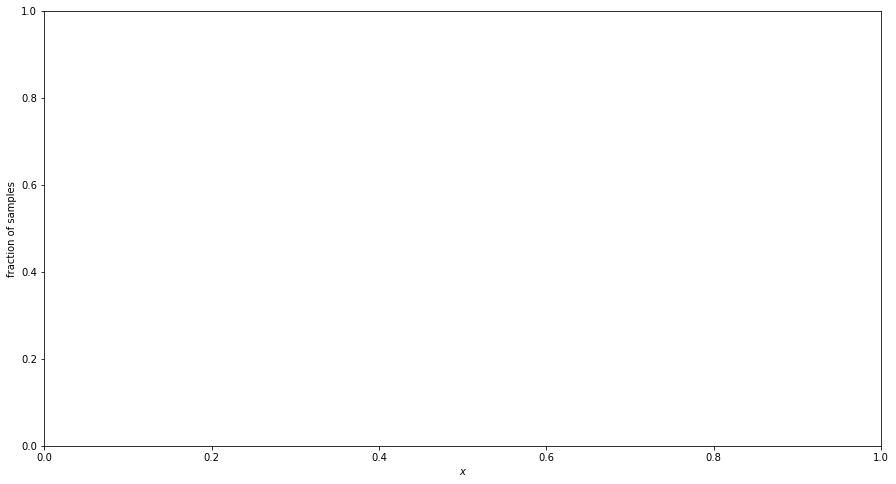

In [31]:
plt.hist(sample, bins=1000, normed=True)
plt.figure(figsize=(15, 8))
# plt.plot(x, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Какое математическое ожидание подбрасывания 6-гранного кубика?

In [33]:
(1 +2 +3 + 4 + 5 + 6) / 6

3.5

In [ ]:
3 4 2 7 9 0 10 

Определить матож, медиану и моду нормального распределения, равномерного распределения

In [41]:
## решение здесь

Оценим параметры дисперсии нормального, экспоненциального распределения

$$\bar{X} = \frac 1n \sum_i X_i $$

$$m = \begin{cases}
X_{(n / 2)},\ n = 2k \\
\dfrac{X_{(n / 2)} + X_{(n / 2) + 1}}{2},\ n = 2k + 1 \\
\end{cases}$$

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

In [48]:
## решение здесь
import math
n =1000
norm_rv = sts.norm(1, 2)
sample = norm_rv.rvs(n)

mean_x = sum(sample) / n 
median_x = sorted(sample)[n//2]

var_x = 1 / (n - 1) * np.sum([(sample[i] - mean_x)**2 for i in range(n)])
print(f"mean: {mean_x}")
print(f"median : {median_x}")
print(f"var : {var_x}")


mean: 0.855738523904583
median : 0.9360905626550862
var : 4.047110067325968


In [51]:
print(f"var: {sample.var()}")
print(f"mean: {sample.mean()}")


var: 4.043062957258642
mean: 0.8557385239045827


In [37]:
## решение здесь
n =1000
norm_rv = sts.norm(3, 2)
sample = norm_rv.rvs(n)

mean_x = sum(sample) / n 
print(mean_x)

2.97577378599


## ЦПТ

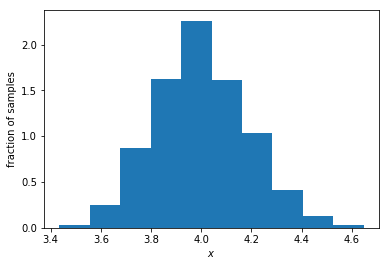

In [56]:
results = []
n = 30
exp_rv = sts.expon(3)
for i in range(1000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

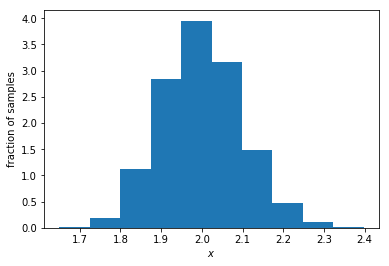

In [48]:
results = []
n = 100
exp_rv = sts.expon(1)
for i in range(10000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [49]:
# проверьте свое распределение на удовлетворение ЦПТ

In [59]:
results = []
n = 3
exp_rv = sts.poisson(4)
for i in range(10000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')